# Chapter 3 - Exercise 1
#### Author: *John Benedick Estrada*
---
**Exercise:** In a ring lattice, every node has the same number of neighbors.  The number of neighbors is called the **degree** of the node, and a graph where all nodes have the same degree is called a **regular graph**.

All ring lattices are regular, but not all regular graphs are ring lattices.  In particular, if `k` is odd, we can't construct a ring lattice, but we might be able to construct a regular graph.

Write a function called `make_regular_graph` that takes `n` and `k` and returns a regular graph that contains `n` nodes, where every node has `k` neighbors.  If it's not possible to make a regular graph with the given values of `n` and `k`, the function should raise a `ValueError`.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from typing import Iterator, Iterable

%matplotlib inline

In [2]:
def make_regular_graph(n: int, k: int):
    """
    Return a regular Graph with `n` number of nodes all of which has `k` number
    of neighbors.
    """
    nodes = range(n)
    edges = get_regular_edges(nodes, k)
    if k > 0 and len(edges) == 0:
        raise ValueError(f"Cannot make a {k}-regular graph with {n} node(s)")

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G


def get_regular_edges(nodes: Iterator, k: int):
    """
    Return all possible edges of for a `k`-regular graph from the given set of
    nodes `nodes`.

    Returns an empty list if a `k`-regular graph cannot be constructed with the
    given number of nodes.
    """
    neighbor_count = dict((n, 0) for n in nodes)
    n_len = len(nodes)

    node_pairs = []
    for i, node in enumerate(nodes):
        node_iter = zigzagify(nodes, i)
        while neighbor_count[node] < k:
            # Manually iterate the node iterator.
            try:
                adj_node = next(node_iter)
            except StopIteration:
                return []

            if node is adj_node:
                continue

            if neighbor_count[adj_node] < k:
                node_pairs.append((node, adj_node))
                neighbor_count[node] += 1
                neighbor_count[adj_node] += 1

    return node_pairs


def zigzagify(itrbl: Iterable, idx: int):
    """
    Return an iterator iterating through `itrbl` in a zigzag pattern,
    i.e. `itrbl[idx], itrbl[idx + 1], itrbl[idx - 1], ...`
    """
    return map(itrbl.__getitem__, zigzag(idx, len(itrbl)))


def zigzag(i: int, n: int):
    """
    Return `[i, i+1, i-1, i+2, i-2 ... n//2+1, n//2]`
    """
    if i >= n or n < 0:
        raise ValueError("'idx' out of bounds.")
    return [(i + (2*(j % 2) - 1)*ceil(j/2)) % n for j in range(n)]

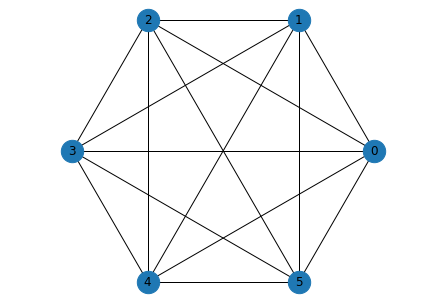

In [3]:
G = make_regular_graph(n=6, k=5)
nx.draw_circular(G,
                 node_size=500, 
                 with_labels=True)
plt.axis('equal')
plt.show()